---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [39]:
def answer_one():
    
    df = pd.read_csv('fraud_data.csv')
    # relevant stuff
    df1 = df[['Class']]
    # get both numbers
    counter = df1.groupby(['Class']).agg({'Class': 'count'})
    total = len(df1.index)
    # calculate
    counter['percent'] = counter.ix[:,'Class':].sum(axis=1)/total
    
    return counter.at[1,'percent']

0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

df.head

<bound method NDFrame.head of              V1        V2        V3        V4        V5        V6        V7  \
0      1.176563  0.323798  0.536927  1.047002 -0.368652 -0.728586  0.084678   
1      0.681109 -3.934776 -3.801827 -1.147468 -0.735540 -0.501097  1.038865   
2      1.140729  0.453484  0.247010  2.383132  0.343287  0.432804  0.093380   
3     -1.107073 -3.298902 -0.184092 -1.795744  2.137564 -1.684992 -2.015606   
4     -0.314818  0.866839 -0.124577 -0.627638  2.651762  3.428128  0.194637   
5     -0.713266  0.869132  0.330114  0.902275  0.520836 -0.537036  0.301955   
6      1.219060 -0.207708  0.782809  0.271655 -0.456658  0.414201 -0.675133   
7      0.683918  0.329216 -1.693025 -1.123644  2.662177  3.563731 -0.309291   
8     -1.127820  1.461342  0.526673 -0.158998  0.353158 -1.539196  0.727383   
9     -1.757794  0.821894  2.529482 -0.328198 -0.902062  0.739803 -0.119755   
10     0.349277 -2.539493  0.645773 -0.503734 -1.792852  0.986512 -0.927262   
11    -0.411810  1.023

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [44]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_predicted = dummy_majority.predict(X_test)
    
    accuracy = dummy_majority.score(X_test, y_test)
    recall = recall_score(y_test, y_predicted)
    
    return (accuracy,recall)

(0.98525073746312686, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [48]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    svm = SVC().fit(X_train, y_train)
    y_predicted = svm.predict(X_test)
        
    accuracy = svm.score(X_test, y_test)
    recall = recall_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted)
    
    return (accuracy,recall,precision)

(0.99078171091445433, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [58]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    svm = SVC(C=1e9,gamma=1e-07).fit(X_train, y_train)
    
    thresh = -220
    
    y_score_svm = svm.decision_function(X_test) > thresh
      
    y_predicted = svm.predict(X_test) 
       
    confusion = confusion_matrix(y_test, y_score_svm)
    
    return confusion

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [67]:
def answer_five():
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve
    
    # set up model
    lr = LogisticRegression().fit(X_train, y_train)
    y_predicted = lr.predict(X_test)
    y_proba_lr = lr.predict_proba(X_test)[:, 1] 
    
    # PrecisionRecall
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba_lr)
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]
    
    my_recall =  recall[np.argmin(abs(precision - 0.75))]
      
    # ROC
    fpr_lr, tpr_lr, thr_lr = roc_curve(y_test, y_proba_lr)
    
    
    my_true_pos = tpr_lr[np.argmin(abs(fpr_lr - 0.16))]
    
    return (my_recall,my_true_pos)

(0.9375, 0.82499999999999996)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [75]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    lr = LogisticRegression() #.fit(X_train, y_train)
    
    grid_values = {'penalty': ['l1', 'l2'],'C':[0.01, 0.1, 1, 10, 100]}
    
    
    grid_clf_prec = GridSearchCV(lr, param_grid = grid_values, scoring = 'recall')
    grid_clf_prec.fit(X_train, y_train)

    y_decision_fn_scores_prec = grid_clf_prec.decision_function(X_test) 
    
    return grid_clf_prec.cv_results_['mean_test_score'].reshape(5,2)

array([[ 0.98982129,  0.9592306 ],
       [ 0.9629166 ,  0.9654521 ],
       [ 0.95069785,  0.95446904],
       [ 0.94225411,  0.94254797],
       [ 0.94225411,  0.94225411]])

<IPython.core.display.Javascript object>


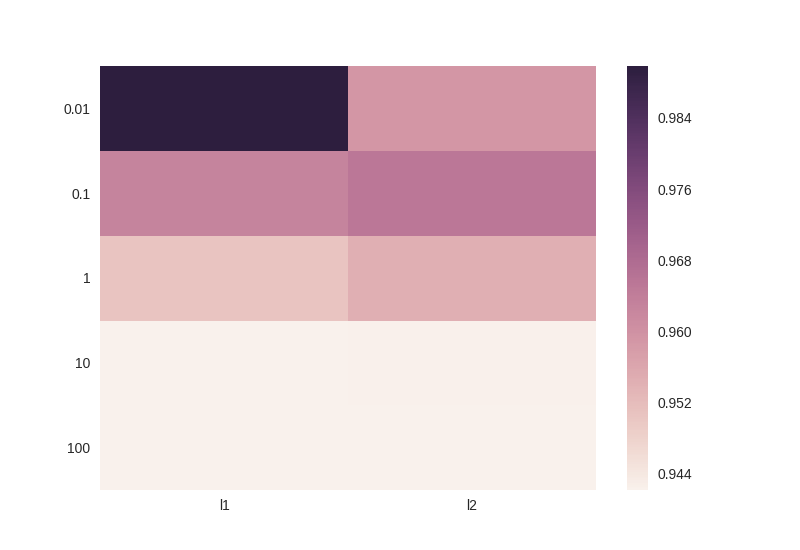

In [76]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())